In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'pokemon', 'winequality-red.csv', 'melbourne-housing-market', 'winemag-data-130k-v2.csv', 'winemag-data-130k-v2.json', 'winemag-data_first150k.csv']


In [2]:
data = pd.read_csv("input/winemag-data_first150k.csv")

In [3]:
data

Unnamed: 0 country                                        description  \
0                0      US  This tremendous 100% varietal wine hails from ...   
1                1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2                2      US  Mac Watson honors the memory of a wine once ma...   
3                3      US  This spent 20 months in 30% new French oak, an...   
4                4  France  This is the top wine from La Bégude, named aft...   
...            ...     ...                                                ...   
150925      150925   Italy  Many people feel Fiano represents southern Ita...   
150926      150926  France  Offers an intriguing nose with ginger, lime an...   
150927      150927   Italy  This classic example comes from a cru vineyard...   
150928      150928  France  A perfect salmon shade, with scents of peaches...   
150929      150929   Italy  More Pinot Grigios should taste like this. A r...   

                                 designation  points  price  \
0                          Martha's Vineyard      96  235.0   
1       Carodorum Selección Especial Reserva      96  110.0   
2              Special Selected Late Harvest      96   90.0   
3                                    Reserve      96   65.0   
4                                 La Brûlade      95   66.0   
...                                      ...     ...    ...   
150925                                   NaN      91   20.0   
150926                        Cuvée Prestige      91   27.0   
150927                         Terre di Dora      91   20.0   
150928                       Grand Brut Rosé      90   52.0   
150929                                   NaN      90   15.0   

                  province           region_1           region_2  \
0               California        Napa Valley               Napa   
1           Northern Spain               Toro                NaN   
2               California     Knights Valley             Sonoma   
3                   Oregon  Willamette Valley  Willamette Valley   
4                 Provence             Bandol                NaN   
...                    ...                ...                ...   
150925      Southern Italy  Fiano di Avellino                NaN   
150926           Champagne          Champagne                NaN   
150927      Southern Italy  Fiano di Avellino                NaN   
150928           Champagne          Champagne                NaN   
150929  Northeastern Italy         Alto Adige                NaN   

                   variety                   winery  
0       Cabernet Sauvignon                    Heitz  
1            Tinta de Toro  Bodega Carmen Rodríguez  
2          Sauvignon Blanc                 Macauley  
3               Pinot Noir                    Ponzi  
4       Provence red blend     Domaine de la Bégude  
...                    ...                      ...  
150925         White Blend    Feudi di San Gregorio  
150926     Champagne Blend                H.Germain  
150927         White Blend                Terredora  
150928     Champagne Blend                   Gosset  
150929        Pinot Grigio            Alois Lageder  

[150930 rows x 11 columns]

In [4]:
data.corr()

Unnamed: 0    points     price
Unnamed: 0    1.000000 -0.094197 -0.036687
points       -0.094197  1.000000  0.459863
price        -0.036687  0.459863  1.000000

In [5]:
data.describe()

Unnamed: 0         points          price
count  150930.000000  150930.000000  137235.000000
mean    75464.500000      87.888418      33.131482
std     43569.882402       3.222392      36.322536
min         0.000000      80.000000       4.000000
25%     37732.250000      86.000000      16.000000
50%     75464.500000      88.000000      24.000000
75%    113196.750000      90.000000      40.000000
max    150929.000000     100.000000    2300.000000

In [6]:
data.points = data.points.astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  float64
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 12.7+ MB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


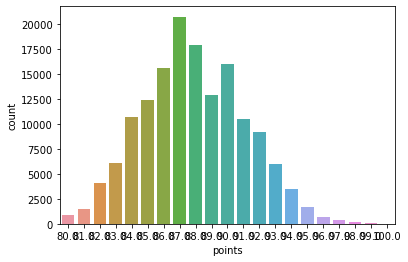

In [8]:
sns.countplot(data['points'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


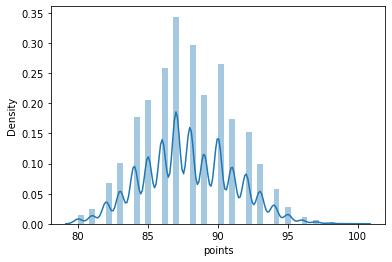

In [9]:
sns.distplot(data['points'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


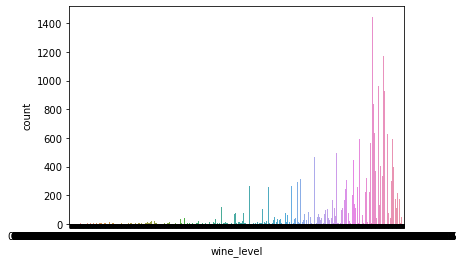

In [10]:
wine_level = []
wine_level = data.points/data.price
data['wine_level'] = data.points/data.price
sns.countplot(data['wine_level'])

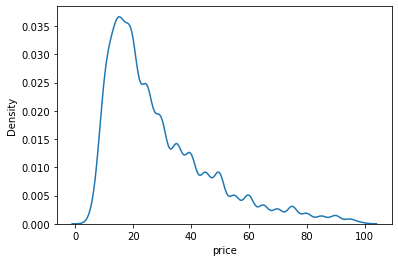

In [11]:
sns.kdeplot(data.query('price < 100').price)

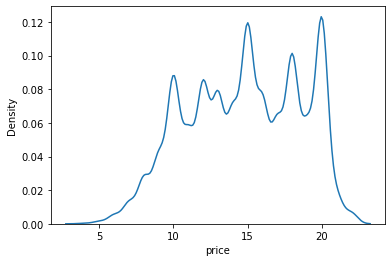

In [12]:
sns.kdeplot(data.query('wine_level > 4.1').price) #wine_level mean = 4.107469

Text(0.5, 1.0, 'Price And Points Plot')

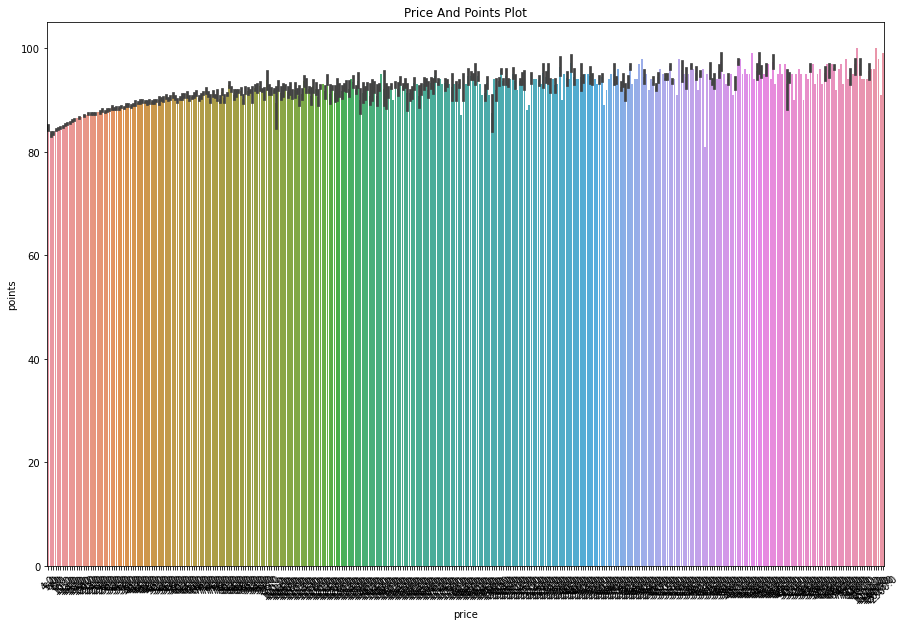

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(x=data['price'], y=data['points'])
plt.xticks(rotation= 45)
plt.xlabel('price')
plt.ylabel('points')
plt.title('Price And Points Plot')

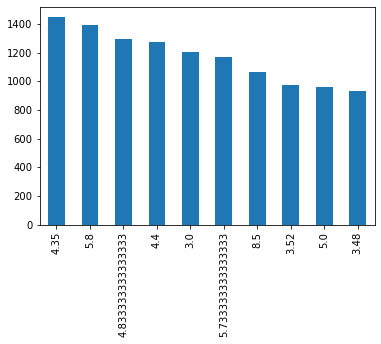

In [14]:
data["wine_level"].value_counts().head(10).plot.bar()

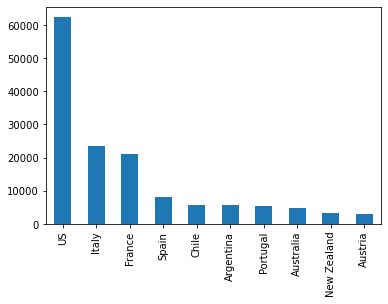

In [15]:
data['country'].value_counts().head(10).plot.bar()

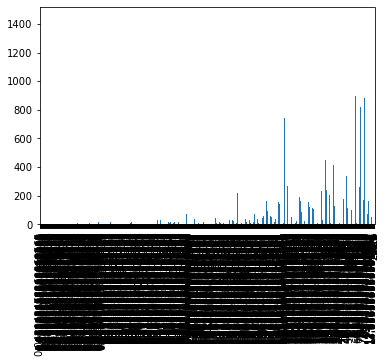

In [16]:
data['wine_level'].value_counts().sort_index().plot.bar()